 # 1.Definicion de objetivo 


  Nuestro objetivo es en base a datos bancarios y de default estimar un modelo que permita predecir segun las caracteristicas de un invidio si este incurrira o no en un defaul crediticio. 

 # 2.Contexto comercial 


Nos encontramos dentro del equipo de Data Science del banco "Amigos contra la inflacion". Su objetivo es dar resguardo a a los ahorradores argentinos frente a la inflacion,proporcionando plazos fijos con tasas de interes reales positivas. 
En base a los depositos  se otorgan prestamos al publico en general. Es importante conocer previamente las  caracteristicas del individio a quien se le orotoga el prestamo para reducir la probabilidad de defaul y poder cumplir con nuestros depositantes. 

 # 3.Problema comercial 

Cuando  un individuo X solicita un prestamos. Si el banco no cuenta con informacion crediticia previa de este cliente se arriesga a otorgarle  dinero a un individuo que quiza no lo devuelva. 

En base a este problema planteamos la pregunta guia de este trabajo ¿ Que variables son relevantes para saber conocer previamente si el individuo incurre en difault o no? 
¿Que valores de estas variables clave separan a los clientes morosos de los no morosos? 

 # 4.Data Adquisicion 

**Datos**


*Credit record: ID: Número de cliente (Cualitativa normal) Months Balance: El mes de los datos extraídos es el punto de partida, al revés, 0 es el mes actual, -1 es el mes anterior, etc. (Cuantitativa discreta) Status: Indica el estado del cliente (Cuantitativa discreta) 0 = 1-29 dias de atraso en el pago de la deuda 1= 30-59 días de atraso en el pago de la deuda 2=60-89 días de atraso en el pago de la deuda 3=90-119 días de atraso en el pago de la deuda 4=120-140 días de atraso en el pago de la deuda 5= Deudas atrasadas o incobrables (más de 150 días de atraso) C= pagado este mes X=no hay préstamo este mes

*Application record: Contiene las características del cliente ID: Número de cliente (Cuantitativa discreta) code gender: Género (Cualitativa Normal) Flag own car: ¿Hay un auto? (Cualitativa Normal) Flag own reality:¿Hay una propiedad? (Cualitativa Normal) cnt children: Número de hijos (Cuantitativa discreta) amt income total : Ingresos anuales (Cuantitativa continua) name income type: Categoría de ingresos (Cuantitativa Ordinal) name education type: Nivel de educación (Cuantitativa Ordinal) name family status: Estado civil (Cualitativa Normal) name housing type: Modo de vivir (Cualitativa Normal) Days Birthday: Días para el cumpleaños. Cuenta hacia atrás, -1 significa ayer. (Cuantitativa continua) Flag Móvil: ¿Hay algun telefono movil? (Cualitativa Normal) Flag_email: ¿Tiene email? (Cualitativa Normal) Occupation Type: Ocupación (Cuantitativa Ordinal) cnt fam members: Tamaño de la familia (Cuantitativa discreta)

In [1]:
pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [3]:

url_credito= "https://github.com/RenzoTenaglia/Data-Science/blob/main/credit_record.csv?raw=true"
url_caract="https://github.com/RenzoTenaglia/Data-Science/blob/main/caracteristicas%20binario.xlsb?raw=true"
caract=pd.read_excel(url_caract)
credito=pd.read_csv(url_credito)
data=pd.merge(caract,credito, how= "inner")

In [ ]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [4]:
#Nuesta data esta contaminada por datos duplicados procedemos a eliminarlos 
data=data.drop_duplicates("ID")

  # 5.EDA ( Analisis exploratorio de datos)**  



In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
MONTHS_BALANCE             0
STATUS                     0
dtype: int64

In [ ]:
data["OCCUPATION_TYPE"]=data["OCCUPATION_TYPE"].fillna("Sin ocupacion")

In [7]:
data["OCCUPATION_TYPE"].value_counts()

Sin ocupacion            11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

In [8]:
cuantitativa=["CNT_CHILDREN","AMT_INCOME_TOTAL","DAYS_EMPLOYED","CNT_FAM_MEMBERS"]
cualitativa=["NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE"]
bolaneas=["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL"]

In [9]:
sns.set_theme(style="darkgrid")

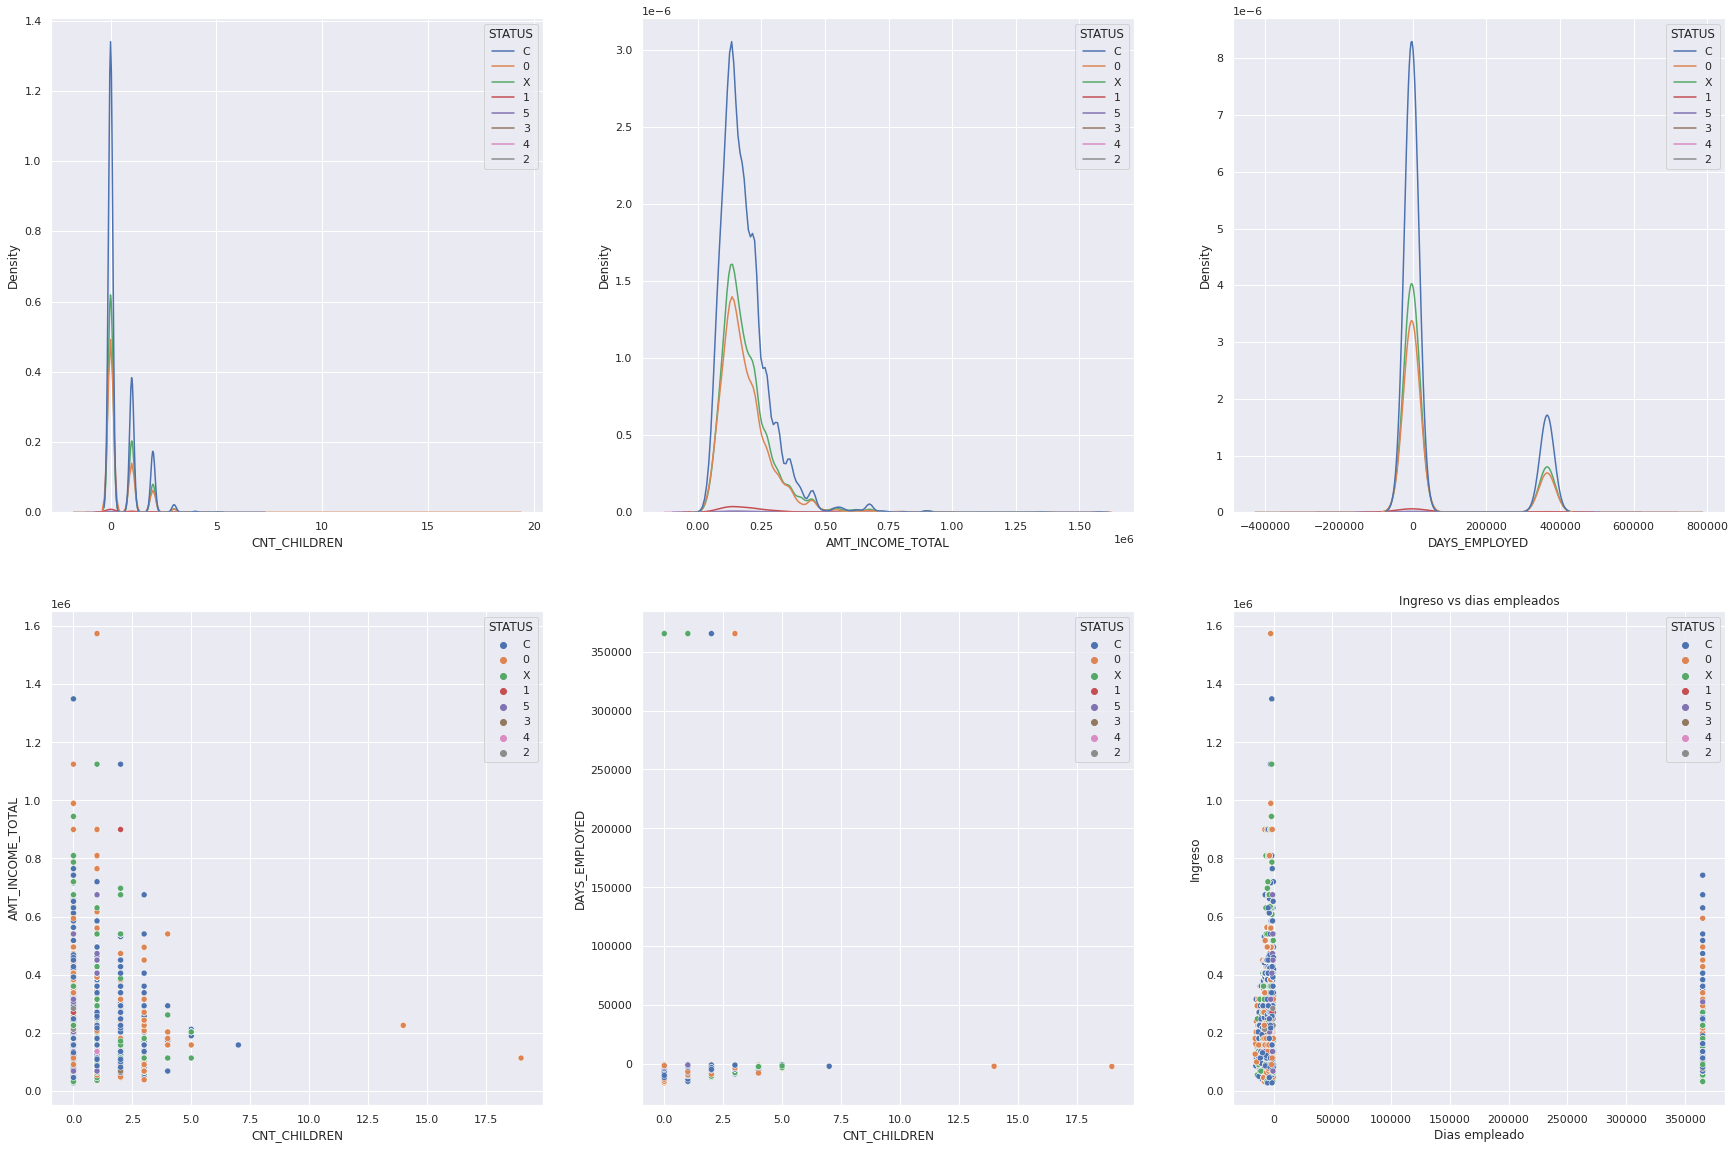

In [14]:
#Cualitativas
fig, axes = plt.subplots(2, 3, figsize=(30,20))

sns.kdeplot(data=data,x="CNT_CHILDREN",hue="STATUS",ax = axes[0,0])
plt.xlabel("Cantidad de hijos")
plt.title("Densidad del numero de hijos")

sns.kdeplot(data=data,x="AMT_INCOME_TOTAL",hue="STATUS", ax = axes[0,1])
plt.xlabel("Ingreso")
plt.title("Densidad del ingreso")

sns.kdeplot(data=data,x="DAYS_EMPLOYED",hue="STATUS", ax = axes[0,2])
plt.xlabel("Dias empleados ")
plt.title("Densidad de los dias empleados ")

sns.scatterplot(data=data,x="CNT_CHILDREN",y="AMT_INCOME_TOTAL",hue="STATUS",ax = axes[1,0])
plt.xlabel("Cantidad de hijos")
plt.ylabel("Ingreso")
plt.title("Ingreso vs cantidad de hijos")
sns.scatterplot(data=data,x="CNT_CHILDREN",y="DAYS_EMPLOYED",hue="STATUS",ax = axes[1,1])
plt.xlabel("Cantidad de hijos")
plt.ylabel("Dias empleados")
plt.title("Cantidad de hijos vs dias empleados")
sns.scatterplot(data=data,x="DAYS_EMPLOYED",y="AMT_INCOME_TOTAL",hue="STATUS",ax = axes[1,2])
plt.xlabel("Dias empleado")
plt.ylabel("Ingreso")
plt.title("Ingreso vs dias empleados")

plt.show()



Text(0.5, 0, 'Donde viven')

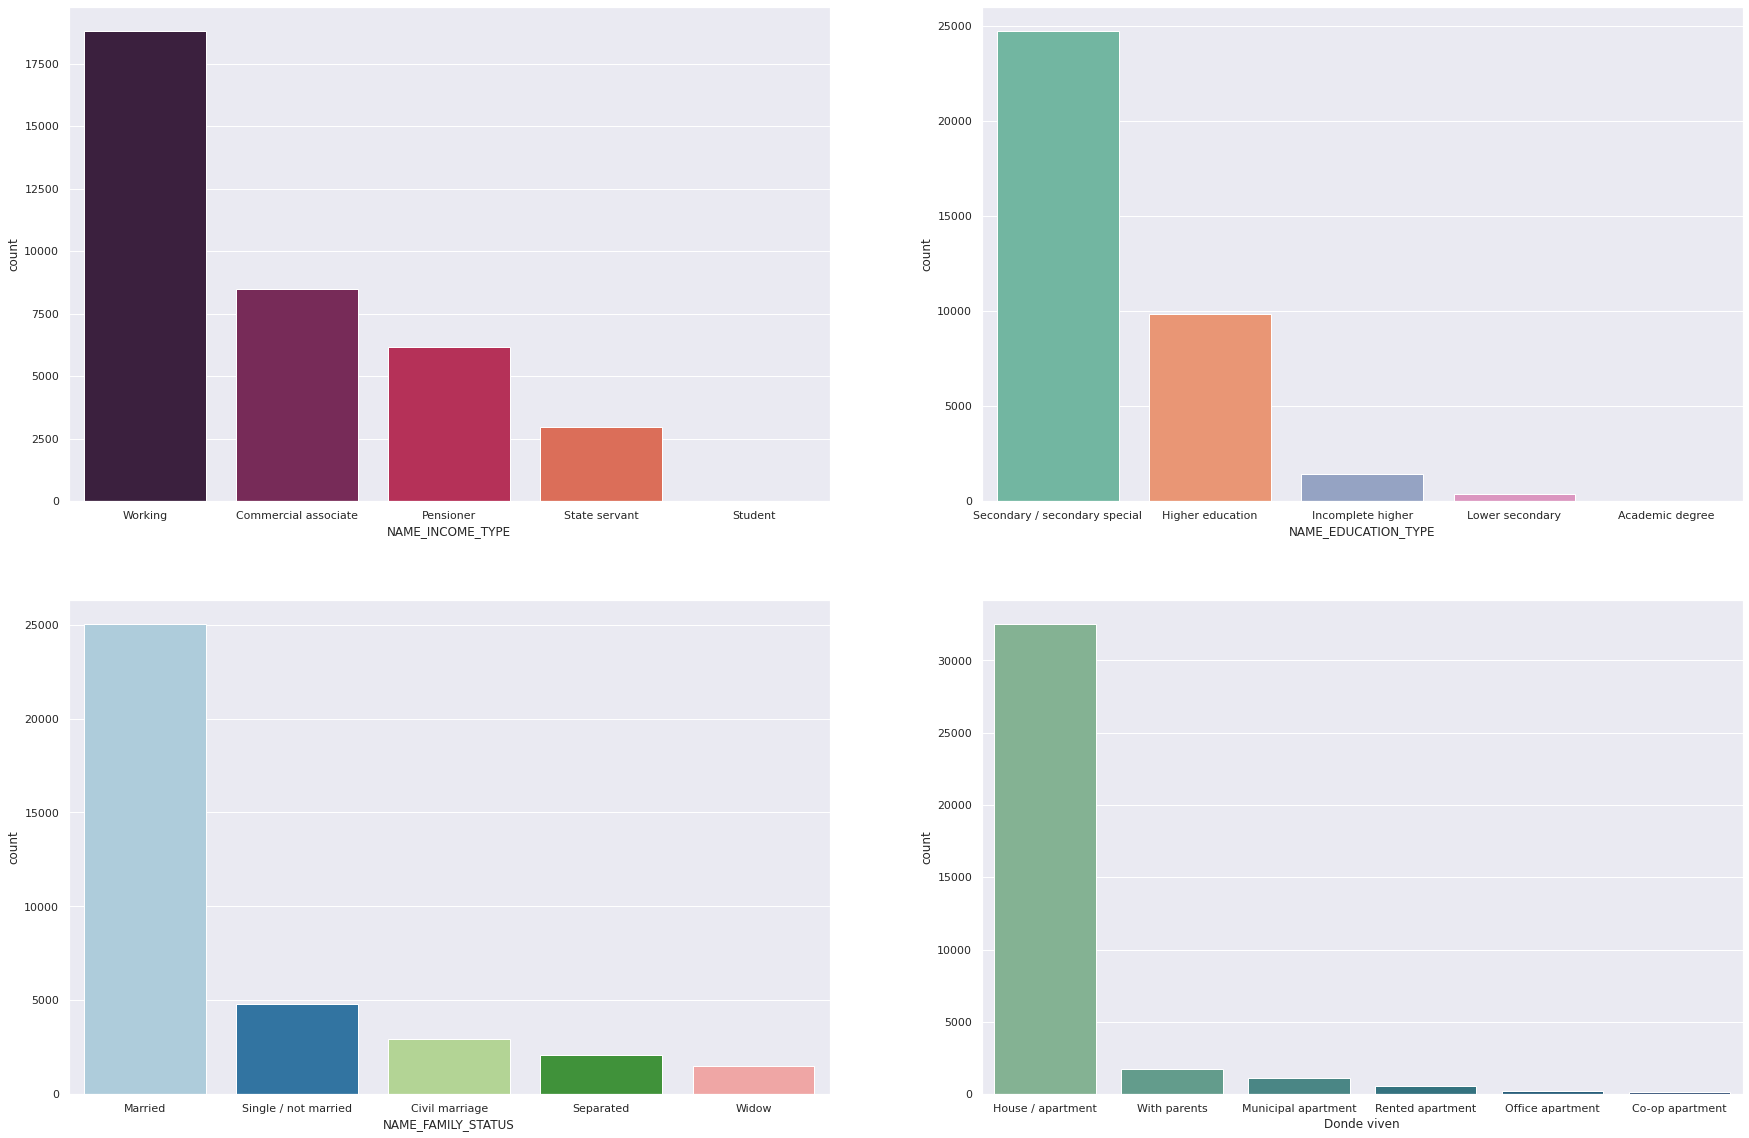

In [12]:
#Cuantitativas
fig, axes = plt.subplots(2, 2, figsize=(30,20))

sns.countplot(x = 'NAME_INCOME_TYPE', palette='rocket',order = data['NAME_INCOME_TYPE'].value_counts().index, data = data, ax = axes[0,0])
plt.xlabel("Tipo de ingreso")
sns.countplot(x = 'NAME_EDUCATION_TYPE', palette='Set2',order = data['NAME_EDUCATION_TYPE'].value_counts().index, data = data, ax = axes[0,1])
plt.xlabel("Nivel de educacion")
sns.countplot(x = 'NAME_FAMILY_STATUS', palette="Paired",order = data['NAME_FAMILY_STATUS'].value_counts().index, data = data, ax = axes[1,0])
plt.xlabel("Estado familiar")
sns.countplot(x = 'NAME_HOUSING_TYPE', palette="crest",  order = data['NAME_HOUSING_TYPE'].value_counts().index,data = data, ax = axes[1,1])
plt.xlabel("Donde viven")


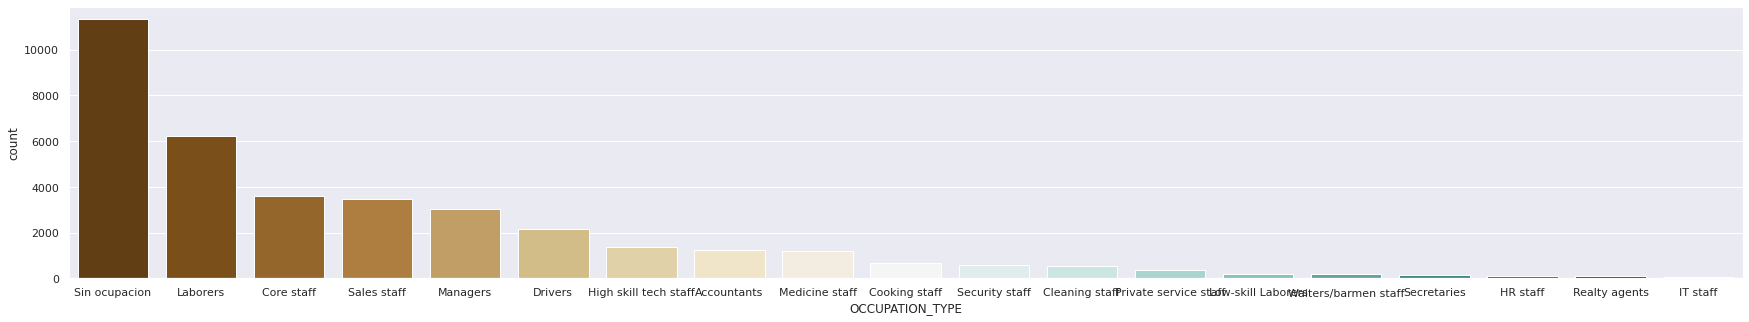

In [15]:
plt.figure(figsize=(30,5))
sns.countplot(x = 'OCCUPATION_TYPE', palette="BrBG",order = data['OCCUPATION_TYPE'].value_counts().index, data = data)

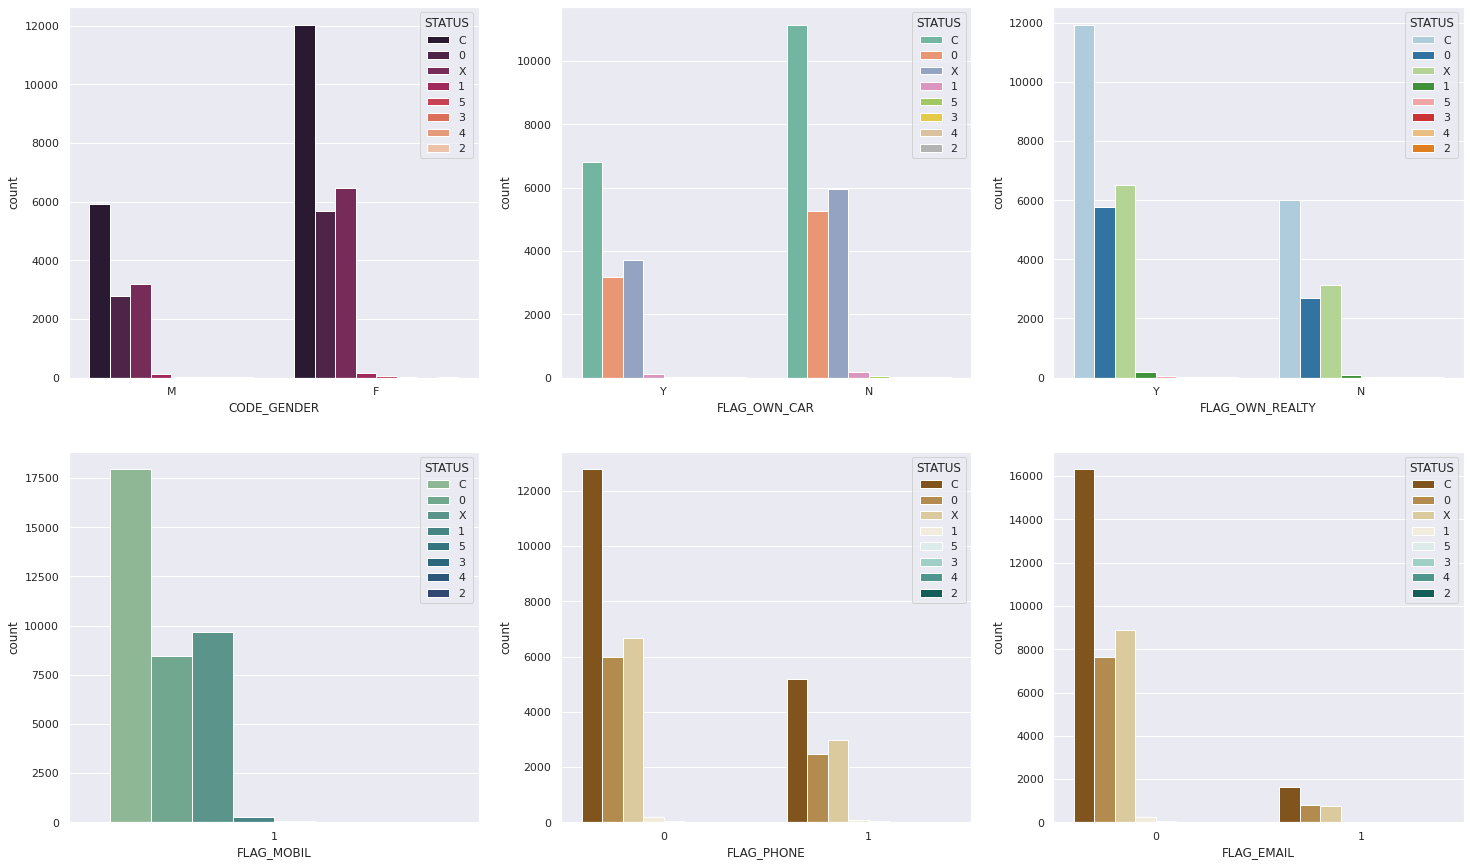

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(25,15))

sns.countplot(x = 'CODE_GENDER', palette='rocket', data = data, ax = axes[0,0],hue="STATUS")
sns.countplot(x = 'FLAG_OWN_CAR', palette='Set2', data = data, ax = axes[0,1],hue="STATUS")
sns.countplot(x = 'FLAG_OWN_REALTY', palette="Paired", data = data, ax = axes[0,2],hue="STATUS")
sns.countplot(x = 'FLAG_MOBIL', palette="crest", data = data, ax = axes[1,0],hue="STATUS")
sns.countplot(x = 'FLAG_PHONE', palette="BrBG", data = data, ax = axes[1,1],hue="STATUS")
sns.countplot(x = 'FLAG_EMAIL', palette="BrBG", data = data, ax = axes[1,2],hue="STATUS")

 # 6 . Data Wrangling 

In [17]:
data=data.replace(["Y","N"],[1,0])
data=data.replace(["M","F"],[1,0])
data["OCCUPATION_TYPE"]=data["OCCUPATION_TYPE"].fillna("Sin ocupacion")

In [18]:
#One hot coding 
data["SECUNDARIA"]=np.where(data["NAME_EDUCATION_TYPE"] == "Secondary / secondary special",1,0 )
data["PRIMARIA"]=np.where(data["NAME_EDUCATION_TYPE"] == "Lower secondary",1,0 )
data["SUPERIOR"]=np.where(data["NAME_EDUCATION_TYPE"] == "Higher education",1,0 )
data["SUPERIOR_INCOMPLETO"]=np.where(data["NAME_EDUCATION_TYPE"] == "Incomplete higher",1,0 )
data["ACADEMICO"]=np.where(data["NAME_EDUCATION_TYPE"] == "Academic degree",1,0 )

In [19]:
#Label encoder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data["TRABAJO"]=labelencoder.fit_transform(data["NAME_INCOME_TYPE"])
data["TIPO_DE_TRABAJO"]=labelencoder.fit_transform(data["OCCUPATION_TYPE"])
data["SITUACION_CIVIL"]=labelencoder.fit_transform(data["NAME_FAMILY_STATUS"])
data["DONDE_VIVEN"]=labelencoder.fit_transform(data["NAME_HOUSING_TYPE"])
data["SITUACION"]=labelencoder.fit_transform(data["STATUS"])


In [20]:
#Creamos un nuevo data frame que contiene solo las variables numericas
df=data.drop(["NAME_INCOME_TYPE","OCCUPATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","NAME_EDUCATION_TYPE","STATUS"],axis=1)


Text(0.5, 1.0, 'Densidad de Situacion')

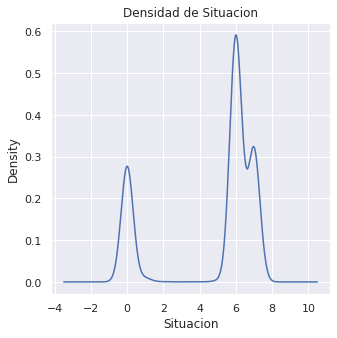

In [22]:
plt.figure(figsize=(5,5))
df.SITUACION.plot(kind="density")
plt.xlabel("Situacion")
plt.title("Densidad de Situacion")

#Hacer scatterplot entre ingreso y situacion 

(0.0, 7.0)

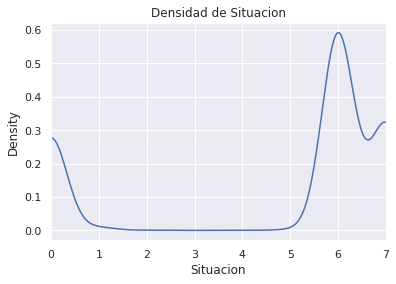

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

#plt.figure(figsize=(5,5))
df.SITUACION.plot(kind="density")
plt.xlabel("Situacion")
plt.title("Densidad de Situacion")
ax.set_xlim([0, 7])

#Hacer scatterplot entre ingreso y situacion 

(0.0, 7.0)

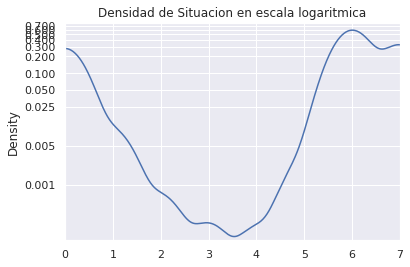

In [25]:
import matplotlib.pyplot as pl
from matplotlib.ticker import ScalarFormatter


fig = pl.figure()
ax = fig.add_subplot(111)

df.SITUACION.plot(kind="density")

plt.title("Densidad de Situacion en escala logaritmica")
ax.plot(color='red', lw=2)
ax.set_yscale('log')
ax.set_yticks([0,0.001, 0.005, 0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7])
ax.get_yaxis().set_major_formatter(ScalarFormatter())
ax.set_ylim([0.0001, 0.8])
ax.set_xlim([0, 7])

[5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 2, 2, 5, 5, 3, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 2, 4, 2, 5, 5, 2, 2, 5, 3, 5, 2, 3, 5, 3, 2, 5, 5, 2, 3, 2, 2, 5, 2, 5, 2, 5, 5, 2, 5, 5, 4, 2, 2, 5, 5, 5, 5, 5, 2]


(2.0, 5.0)

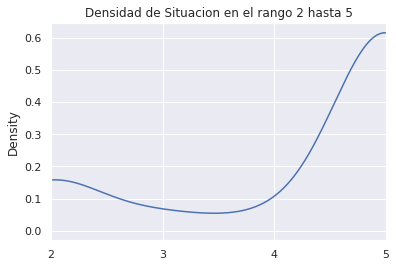

In [28]:
alpha = df["SITUACION"]
beta=[]

for x in alpha:
  if x > 1 and x <6:
    beta.append(x)

  else:
    pass

print(beta)

fig = pl.figure()
ax = fig.add_subplot(111)

gamma = pd.DataFrame (beta, columns = ['beta'])

gamma.beta.plot(kind="density")

plt.title("Densidad de Situacion en el rango 2 hasta 5")
ax.set_xticks([2, 3, 4, 5])
ax.plot(color='red', lw=2)
ax.set_xlim([2, 5])

# 7.Seleccion del algoritmo 

Utilizaremos un algoritmo de  aprendizaje  supervisado. A pesar de que nuestra variable Target es de tipo numerica, cada numero representa una categoria por lo que nos parece correcto usar un algortimo de clasificacion para resolver nuestro problema de clasificacion multiclase. 

In [29]:
columnas=list(df.columns)
columnas

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE',
 'SECUNDARIA',
 'PRIMARIA',
 'SUPERIOR',
 'SUPERIOR_INCOMPLETO',
 'ACADEMICO',
 'TRABAJO',
 'TIPO_DE_TRABAJO',
 'SITUACION_CIVIL',
 'DONDE_VIVEN',
 'SITUACION']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler




In [31]:
#knn
X= df.drop(["ID","DAYS_BIRTH","MONTHS_BALANCE","SITUACION","FLAG_MOBIL"],axis=1)
y= df.SITUACION

scaler=MinMaxScaler()
X_test , X_train, y_test, y_train = train_test_split(X,y,test_size=0.3,random_state=44)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n=10

knn=KNeighborsClassifier(n)
model=knn.fit(X_train,y_train)
pred=model.predict(X_test)

print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.29      0.20      0.24      5874
           1       0.00      0.00      0.00       191
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        53
           6       0.53      0.72      0.61     12623
           7       0.38      0.24      0.29      6756

    accuracy                           0.46     25519
   macro avg       0.15      0.14      0.14     25519
weighted avg       0.43      0.46      0.43     25519



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn import tree

X= df.drop(["ID","DAYS_BIRTH","MONTHS_BALANCE","SITUACION","FLAG_MOBIL"],axis=1)
y= df.SITUACION

X_test , X_train, y_test, y_train = train_test_split(X,y,test_size=0.3,random_state=44)

clf=DecisionTreeClassifier(random_state=0,max_depth= 50)
model=clf.fit(X_train,y_train)
pred=model.predict(X_test)

print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.31      0.38      0.35      5874
           1       0.07      0.06      0.06       191
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.24      0.23      0.23        53
           6       0.60      0.59      0.59     12623
           7       0.47      0.38      0.42      6756

    accuracy                           0.48     25519
   macro avg       0.21      0.21      0.21     25519
weighted avg       0.49      0.48      0.49     25519



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.40      0.29      0.34      2582
           1       0.04      0.01      0.02        85
           2       0.25      0.20      0.22         5
           3       0.00      0.00      0.00         3
           5       0.42      0.22      0.29        23
           6       0.60      0.74      0.67      5327
           7       0.54      0.46      0.49      2913

    accuracy                           0.55     10938
   macro avg       0.32      0.27      0.29     10938
weighted avg       0.53      0.55      0.54     10938



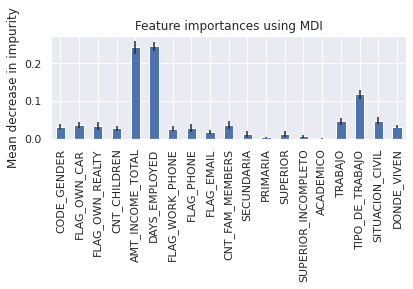

In [33]:
X=df.drop(["SITUACION","MONTHS_BALANCE","DAYS_BIRTH","ID","FLAG_MOBIL"],axis=1)
y=df.SITUACION

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=44)

#clf=DecisionTreeClassifier(max_depth=30,random_state=87,min_samples_leaf=15)
clf=RandomForestClassifier(random_state=0)
model=clf.fit(X_train,y_train)
predictions1 = model.predict(X_test)



print(metrics.classification_report(y_test,predictions1))

import time 

variables=X.columns
start_time=time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances, index=variables)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()